# Hand Written Digit Classification with Keras

In [1]:
# Loading necessary packages

import numpy

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

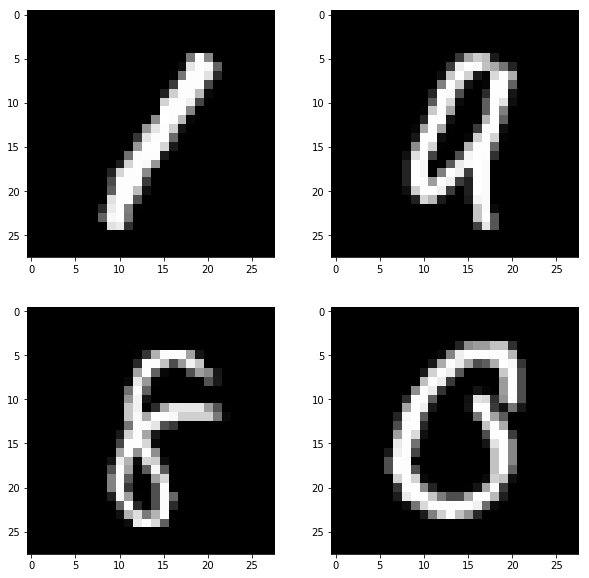

In [5]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(X_train[23], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[788], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[456], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[234], cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Base Line Model

In [9]:
# define baseline model
def baseline_model():
    
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [10]:
# build the model
model = baseline_model()

In [11]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
10s - loss: 0.2793 - acc: 0.9208 - val_loss: 0.1417 - val_acc: 0.9568
Epoch 2/10
9s - loss: 0.1119 - acc: 0.9677 - val_loss: 0.0926 - val_acc: 0.9710
Epoch 3/10
9s - loss: 0.0719 - acc: 0.9796 - val_loss: 0.0782 - val_acc: 0.9765
Epoch 4/10
9s - loss: 0.0504 - acc: 0.9858 - val_loss: 0.0750 - val_acc: 0.9767
Epoch 5/10
9s - loss: 0.0373 - acc: 0.9892 - val_loss: 0.0670 - val_acc: 0.9798
Epoch 6/10
9s - loss: 0.0270 - acc: 0.9924 - val_loss: 0.0620 - val_acc: 0.9806
Epoch 7/10
9s - loss: 0.0209 - acc: 0.9947 - val_loss: 0.0612 - val_acc: 0.9811
Epoch 8/10
9s - loss: 0.0142 - acc: 0.9968 - val_loss: 0.0624 - val_acc: 0.9800
Epoch 9/10
9s - loss: 0.0109 - acc: 0.9977 - val_loss: 0.0584 - val_acc: 0.9814
Epoch 10/10
9s - loss: 0.0076 - acc: 0.9987 - val_loss: 0.0580 - val_acc: 0.9820


In [12]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Accuracy: {:.2f}%".format(scores[1]*100))
print("Baseline Error: {:.2f}%".format(100-scores[1]*100))

Baseline Accuracy: 98.20%
Baseline Error: 1.80%


## CNN

In [13]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [15]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [17]:
# define a simple CNN model
def cnn_model():
    
    # create model
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [18]:
# build the model
cnn_model = cnn_model()

In [19]:
# Fit the model
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
171s - loss: 0.2454 - acc: 0.9294 - val_loss: 0.0719 - val_acc: 0.9784
Epoch 2/10
178s - loss: 0.0723 - acc: 0.9784 - val_loss: 0.0475 - val_acc: 0.9850
Epoch 3/10
170s - loss: 0.0517 - acc: 0.9846 - val_loss: 0.0391 - val_acc: 0.9873
Epoch 4/10
170s - loss: 0.0389 - acc: 0.9883 - val_loss: 0.0385 - val_acc: 0.9869
Epoch 5/10
170s - loss: 0.0330 - acc: 0.9897 - val_loss: 0.0458 - val_acc: 0.9858
Epoch 6/10
169s - loss: 0.0274 - acc: 0.9913 - val_loss: 0.0352 - val_acc: 0.9890
Epoch 7/10
169s - loss: 0.0224 - acc: 0.9929 - val_loss: 0.0332 - val_acc: 0.9890
Epoch 8/10
169s - loss: 0.0198 - acc: 0.9937 - val_loss: 0.0282 - val_acc: 0.9911
Epoch 9/10
169s - loss: 0.0168 - acc: 0.9944 - val_loss: 0.0382 - val_acc: 0.9889
Epoch 10/10
170s - loss: 0.0146 - acc: 0.9953 - val_loss: 0.0287 - val_acc: 0.9913


In [20]:
# Final evaluation of the model
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: {:.2f}%".format(cnn_scores[1]*100))
print("CNN Error: {:.2f}%".format(100-cnn_scores[1]*100))

CNN Accuracy: 99.13%
CNN Error: 0.87%


## Large CNN Model

In [ ]:
# define the larger model
def larger_cnn_model():
    
    # create model
    model = Sequential()
    model.add(Convolution2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
# build the model
large_cnn_model = larger_cnn_model()

In [ ]:
# Fit the model
large_cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

In [ ]:
# Final evaluation of the model
large_cnn_scores = large_cnn_model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Accuracy: {:.2f}%".format(large_cnn_scores[1]*100))
print("Large CNN Error: {:.2f}%".format(100-large_cnn_scores[1]*100))